<a href="https://colab.research.google.com/github/MathewS424/DeepLearning_with_PyTorch/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter - 2: **PyTorch Neural Network Classification**

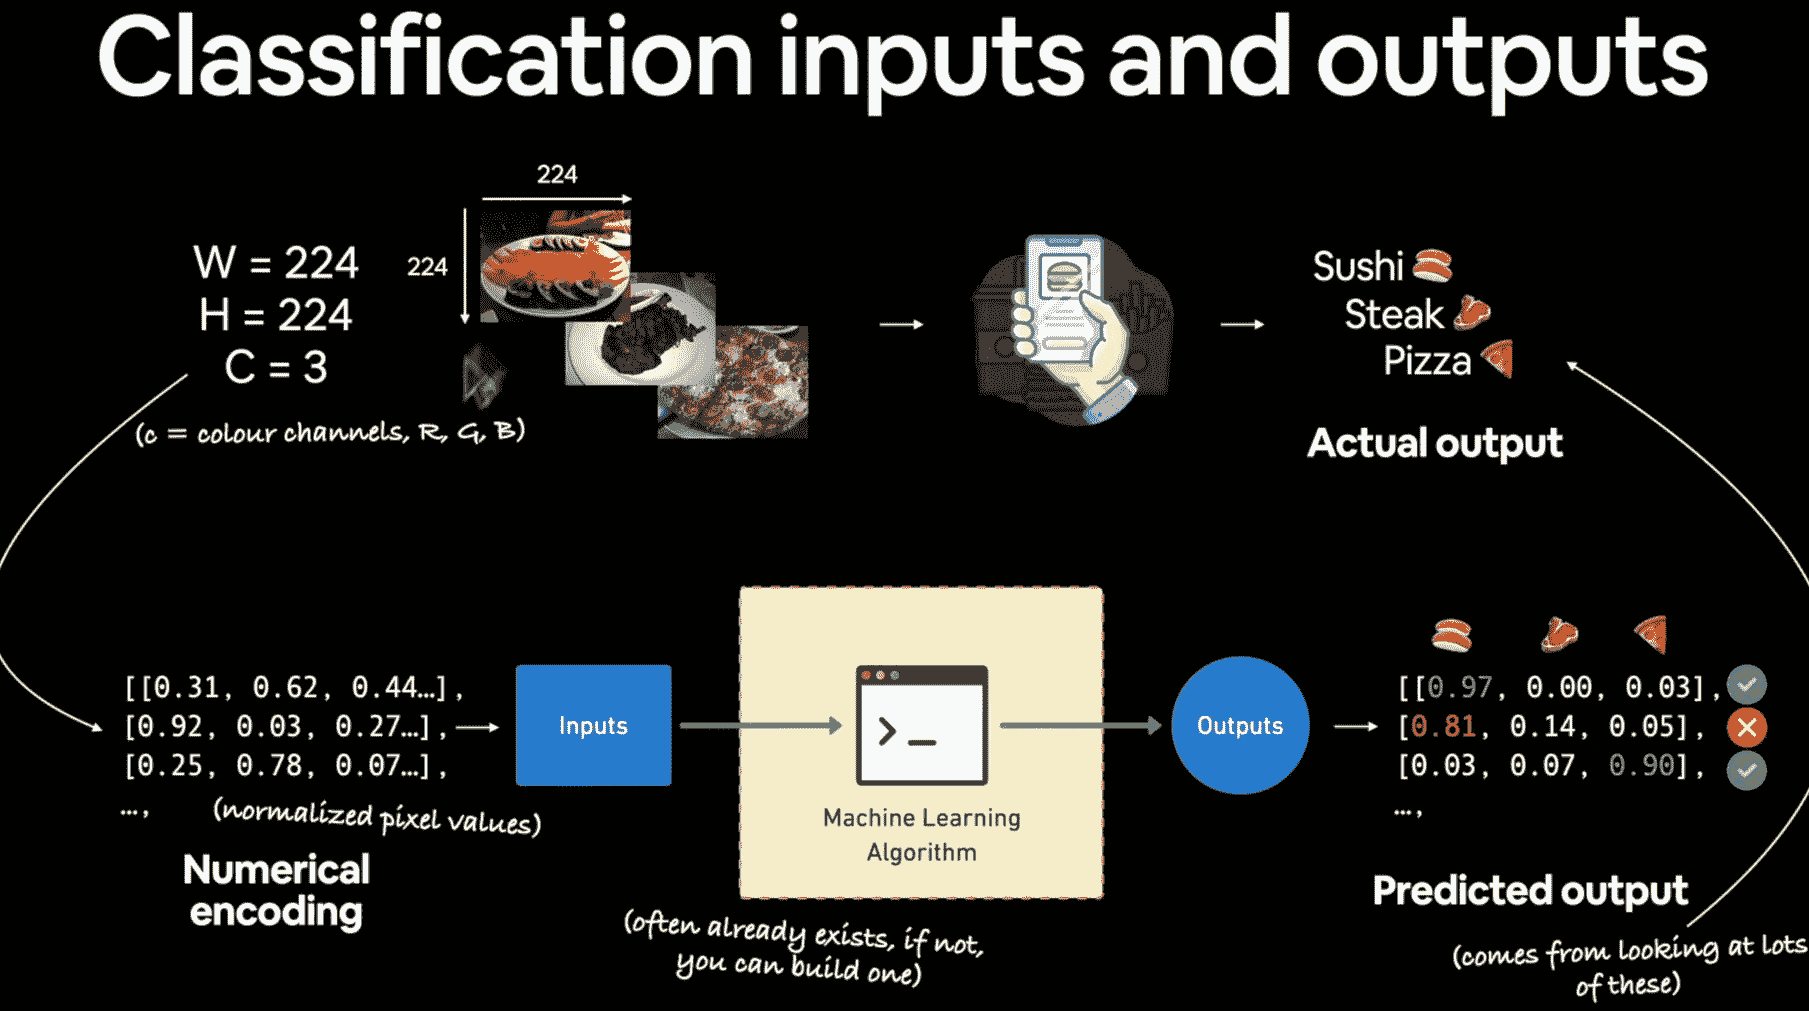

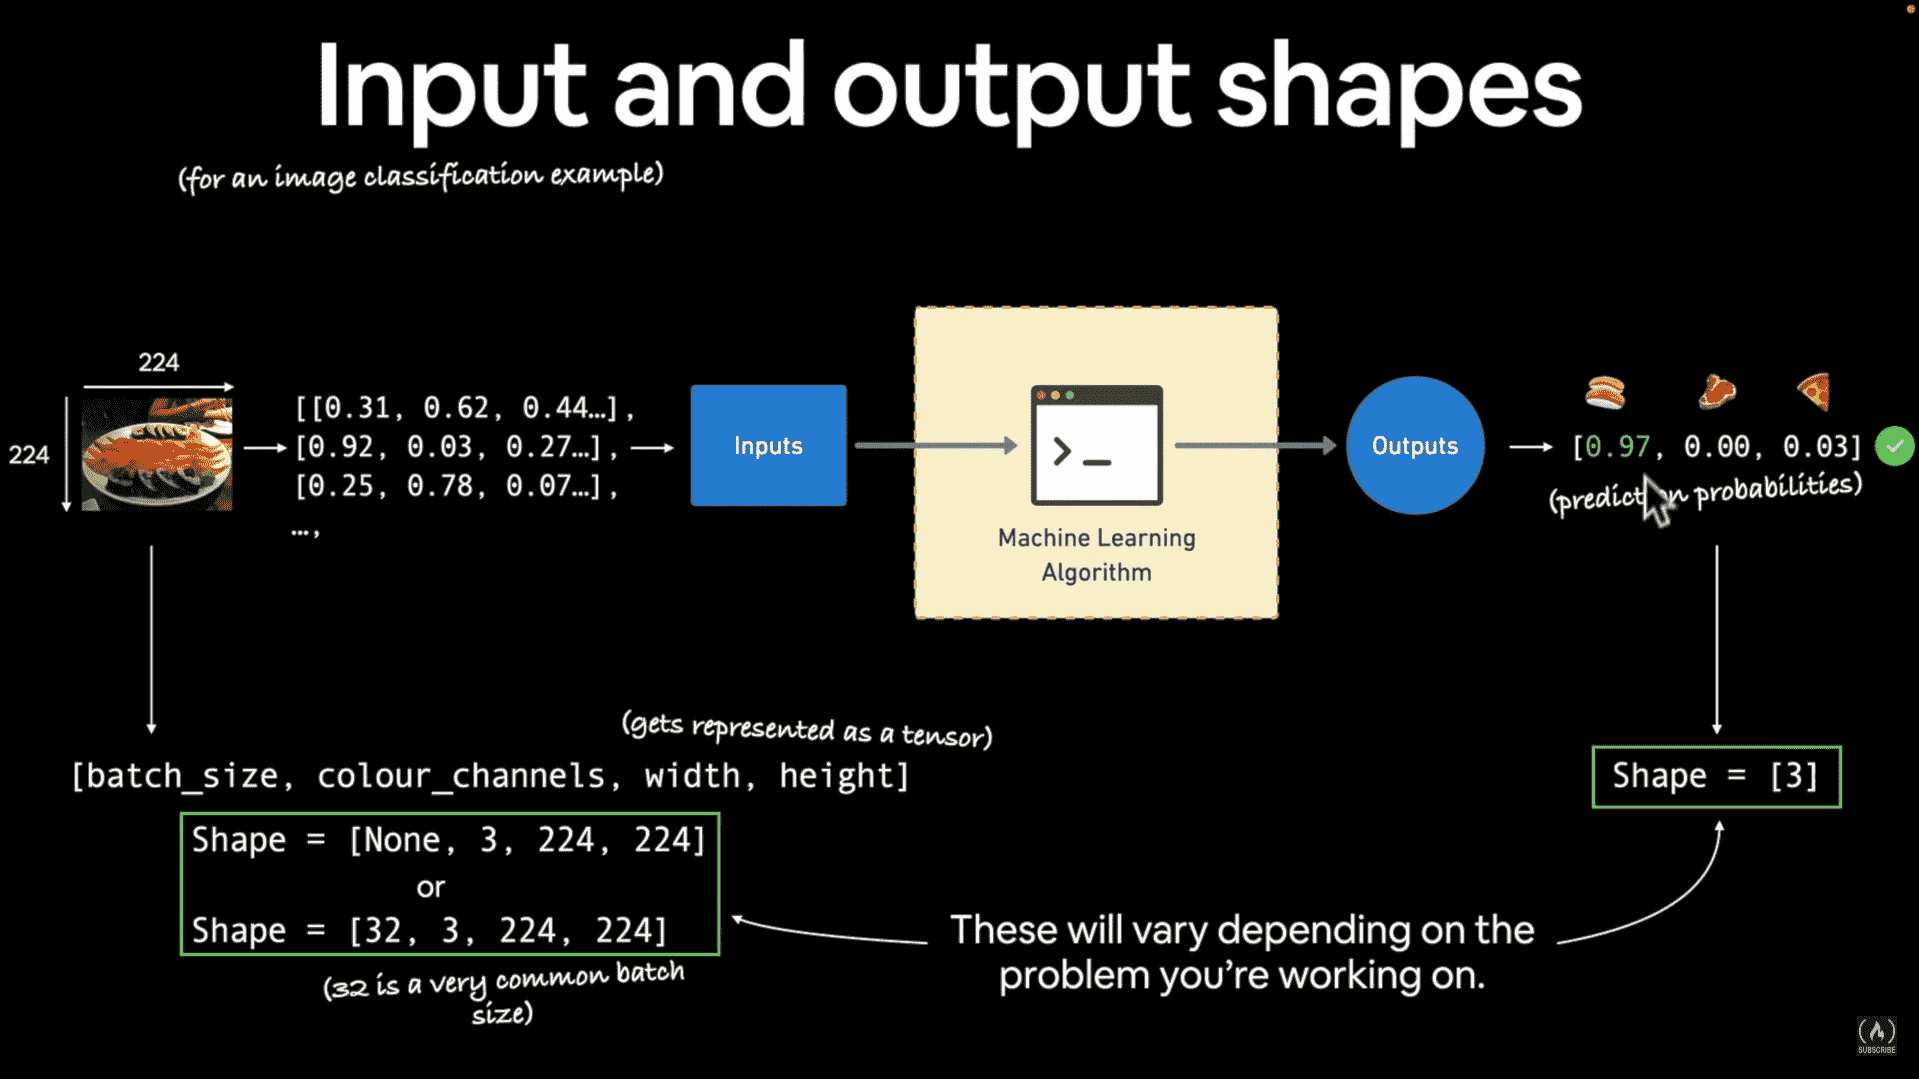

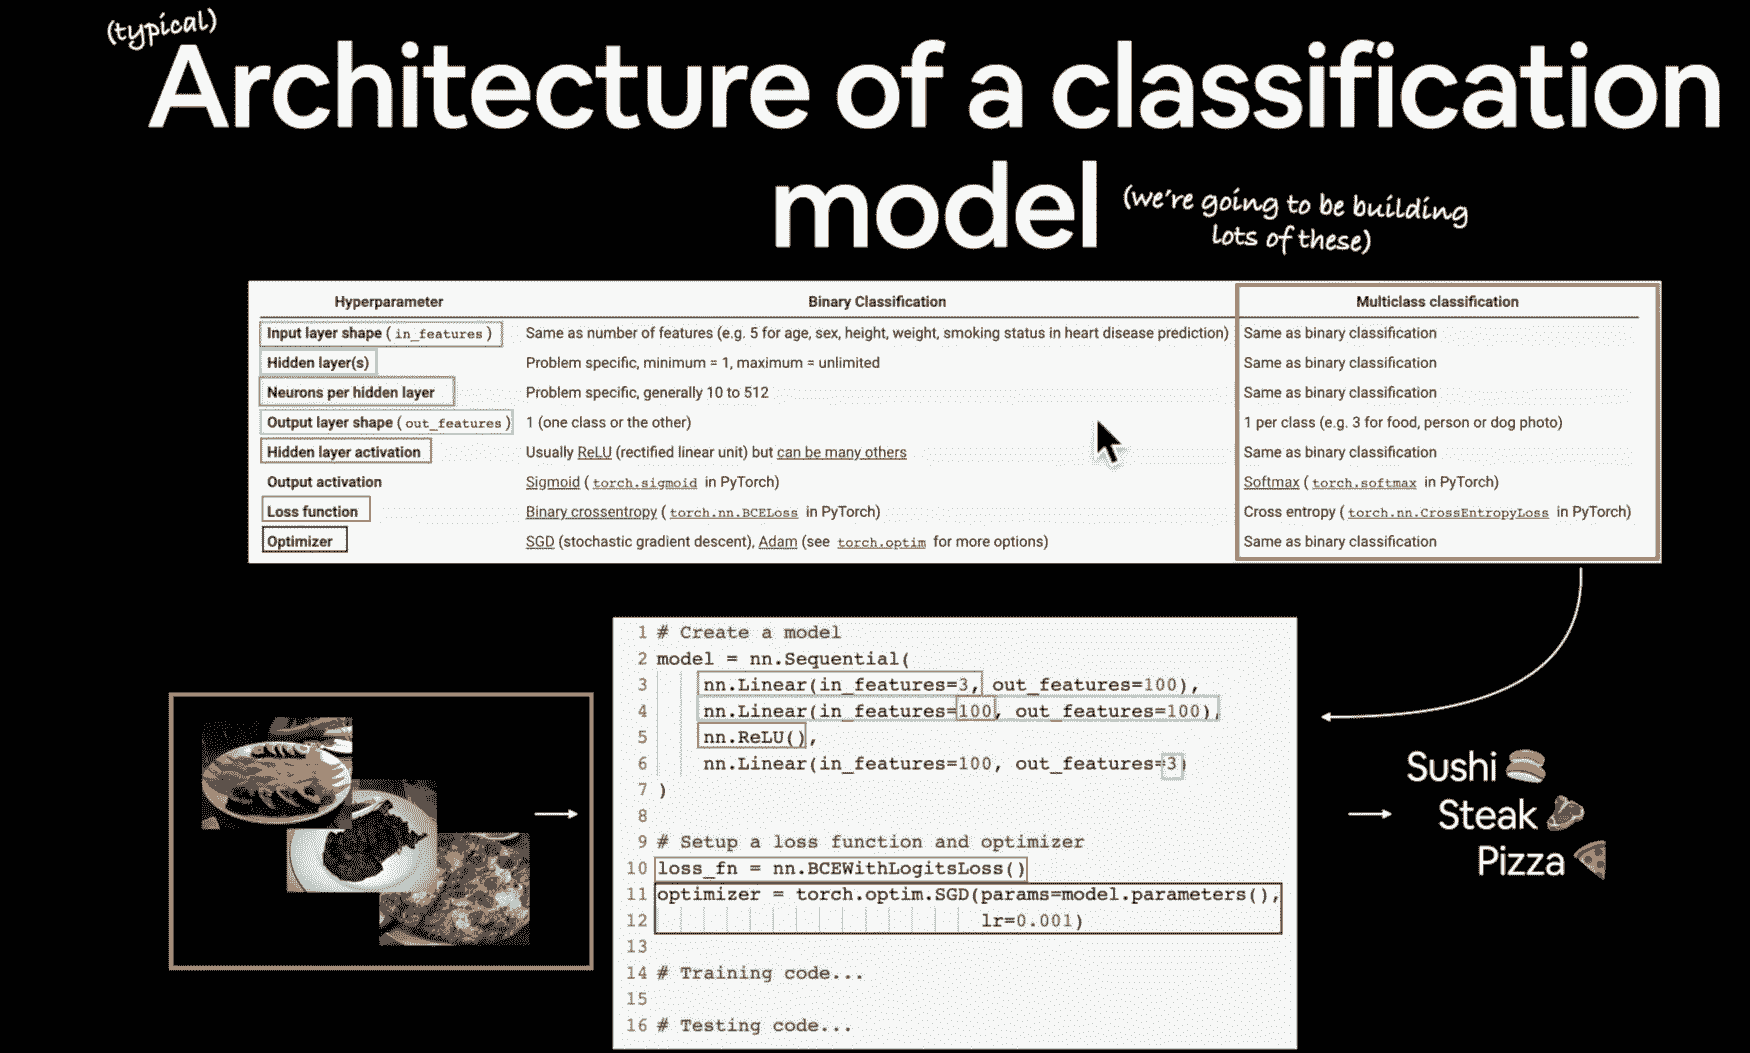

##  1.Make classification data and get it ready

In [29]:
import sklearn

In [30]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [31]:
len(X), len(y)

(1000, 1000)

In [32]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [33]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0],
                      "X1": X[:, 1],
                      "label": y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


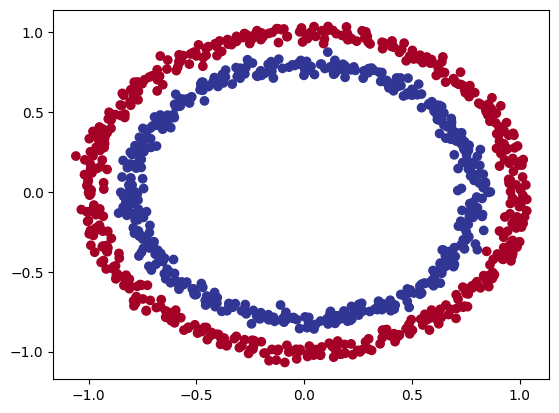

In [34]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [35]:
X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample input of features: {X_sample}")
print(f"Sample output of target: {y_sample}")

Sample input of features: [0.75424625 0.23148074]
Sample output of target: 1


### 1.2 Turn data into tensors and create train and test split


In [37]:
import torch

In [38]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)  # pYtORCH DEFAULT DATA TYPE IS float32 the numpy above is float64 if we doesnt change it tensor will be float64 it might cause error
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [39]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [40]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2.Building Model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code run on an GPU
2. Construct a model (by subclass `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [42]:
# Import PyTorch
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Create a model:

1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass
4. Instatiate an instance of our model class and send it to the target `device`

In [43]:
# 1. Subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)  # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)  # takes in 5 features from previous layer and outputa a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    x = self.layer_1(x)  # x -> layer_1
    x = self.layer_2(x)  # layer_1 -> layer_2  -> output
    return x

# 4. Instantiate an instance of our model class and send it to the target devce
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [44]:
device, next(model_0.parameters()).device

('cuda', device(type='cuda', index=0))

In [45]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [46]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1553, -0.5144],
                      [-0.5707,  0.3939],
                      [ 0.0369, -0.5134],
                      [-0.1340, -0.5585],
                      [ 0.0526, -0.0317]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0835, -0.3227,  0.5280, -0.4961, -0.4831], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2426, -0.1221,  0.4320, -0.0158,  0.2608]], device='cuda:0')),
             ('1.bias', tensor([0.0877], device='cuda:0'))])

In [47]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape of test samples: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 lables: \n{y_test[:10]}")

Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape of test samples: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.0942],
        [0.0791],
        [0.2175],
        [0.0590],
        [0.3500],
        [0.3397],
        [0.1920],
        [0.2534],
        [0.2117],
        [0.0795]], device='cuda:0')

First 10 lables: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function and optimizer ?

Regression - MAE OR MSE

Classification - binary cross entropy or categorical cross entropy

In [48]:
# Setup the losss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

In [49]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1553, -0.5144],
                      [-0.5707,  0.3939],
                      [ 0.0369, -0.5134],
                      [-0.1340, -0.5585],
                      [ 0.0526, -0.0317]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0835, -0.3227,  0.5280, -0.4961, -0.4831], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2426, -0.1221,  0.4320, -0.0158,  0.2608]], device='cuda:0')),
             ('1.bias', tensor([0.0877], device='cuda:0'))])

In [50]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


##  3.Train model

To train a model:

1.  Forward pass
2.  Calculate the loss
3.  Optimizer zero grad
4.  Loss backward (backpropagation)
5.  Optimizer step (gradient descent)


###  3.1 Going from raw logits -> prediction proabablities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation  function(eg. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction proabilities to prediction labels by either rounding them or taking the argmax().

In [51]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0942],
        [0.0791],
        [0.2175],
        [0.0590],
        [0.3500]], device='cuda:0')

In [52]:
y_test[:5]  # We want the y_logits -> in form of -> y_test

tensor([1., 0., 1., 0., 1.])

In [53]:
# Use the sigmoid activation function on our model logits to turn them into prediction proabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5235],
        [0.5198],
        [0.5542],
        [0.5147],
        [0.5866]], device='cuda:0')

In [54]:
torch.round(y_pred_probs)  # So we get in format of y_test

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

### 3.2 Building a training and testing loop

In [55]:
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

In [56]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):

  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  # 2. Calculate the loss
  #####loss = loss_fn_without_logits(torch.sigmoid(y_logits), y_train)  # nn.BCELoss expects prediction proabilities as input

  loss = loss_fn(y_logits, y_train)  # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ###Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)

    # 2.Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70104, Acc: 50.00% | Test Loss: 0.69674, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69626, Acc: 52.75% | Test Loss: 0.69340, Test Acc: 55.00%
Epoch: 20 | Loss: 0.69456, Acc: 53.62% | Test Loss: 0.69251, Test Acc: 60.00%
Epoch: 30 | Loss: 0.69389, Acc: 51.75% | Test Loss: 0.69239, Test Acc: 52.50%
Epoch: 40 | Loss: 0.69358, Acc: 51.62% | Test Loss: 0.69249, Test Acc: 51.00%
Epoch: 50 | Loss: 0.69341, Acc: 51.25% | Test Loss: 0.69265, Test Acc: 50.00%
Epoch: 60 | Loss: 0.69331, Acc: 50.75% | Test Loss: 0.69282, Test Acc: 50.50%
Epoch: 70 | Loss: 0.69323, Acc: 50.50% | Test Loss: 0.69298, Test Acc: 49.00%
Epoch: 80 | Loss: 0.69317, Acc: 50.38% | Test Loss: 0.69314, Test Acc: 48.50%
Epoch: 90 | Loss: 0.69313, Acc: 49.88% | Test Loss: 0.69328, Test Acc: 50.50%
